## using namespace std;

In [1]:
%cd ~/personal/SPH_Simulator/

/home/rboyne1/personal/SPH_Simulator


In [2]:
# logging setup
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.debug("test")

## Import

In [3]:
import json
import matplotlib.pyplot as plt

In [4]:
from sph.objects import Particle, System, Grid
from sph.functions import step_wave
from sph.solve import sph_iterate, euler_step

## Setup the system

In [5]:
SAVE_DIR = '/home/rboyne1/personal/SPH_Simulator/raw_data/testing'

In [6]:
system = System(
    min_x=(0, 0),
    max_x=[20, 10], 
    dx=1.,
    seed=20210501
)

In [7]:
system

System(min_x=(0, 0), max_x=[20, 10], dx=1.0, h_fac=1.3, mu=0.001, rho0=1000.0, c0=20.0, gamma=7.0, CFL=0.2, grav=(0.0, -9.81), P_fac=1.05, x_ref=0.9, pad_fac=1.0, smooth_steps=15, save_steps=15, t_curr=0.0, seed=20210501, rand=Random State (4f6137fa67dc3f5ee11363d5b6999288), h=1.3, d_srch=2.6, dt=0.006500000000000001, B=57142.857142857145, w_fac1=0.2690700643988087, w_fac2=0.20697697261446824, P_ref=23262.881294642884, d_ref=0.9)

In [8]:
with open(f'{SAVE_DIR}/system_0.json', 'w') as f:
    f.write(system.as_json())

In [9]:
!head -n 10 /home/rboyne1/personal/SPH_Simulator/raw_data/testing/system_0.json

{
    "B": 57142.857142857145,
    "CFL": 0.2,
    "P_fac": 1.05,
    "P_ref": 23262.881294642884,
    "c0": 20.0,
    "d_ref": 0.9,
    "d_srch": 2.6,
    "dt": 0.006500000000000001,
    "dx": 1.0,


In [10]:
!wc -l /home/rboyne1/personal/SPH_Simulator/raw_data/testing/system_0.json

36 /home/rboyne1/personal/SPH_Simulator/raw_data/testing/system_0.json


## Setup the particles

In [11]:
grid = Grid(system, step_wave)
grid

Grid ([10.  6.]) with 265 particles in system d04aa

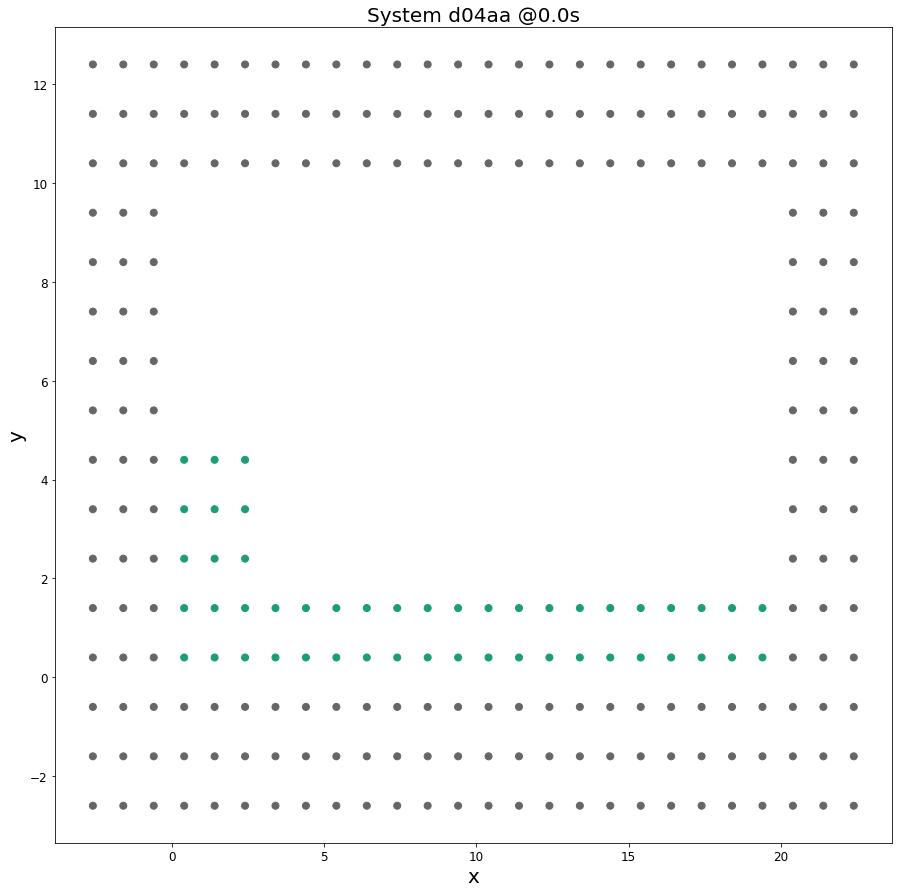

In [12]:
grid.plot()

In [13]:
# plt.savefig(f'{SAVE_DIR}/figure_0.png')

In [14]:
with open(f'{SAVE_DIR}/particles_0.csv', 'w') as f:
    f.write(grid.particle_csv)

In [15]:
!head -n 10 /home/rboyne1/personal/SPH_Simulator/raw_data/testing/particles_0.csv

# Created @Fri Jun  4 22:41:58 2021 by team Southern
# @0.0s 	 Random State (4f6137fa67dc3f5ee11363d5b6999288) 	 system:d04aa82fea2f7dbbf3bed22c757945d2 	 seed:20210501
# Grid ([10.  6.]) with 265 particles in system d04aa
ID,x_x,x_y,v_x,v_y,a_x,a_y,m,D,P,rho,bound
1,-2.6,-2.6,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,1000.0,-1
2,-2.6,-1.6,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,1000.0,-1
3,-2.6,-0.6000000000000001,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,1000.0,-1
4,-2.6,0.3999999999999999,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,1000.0,-1
5,-2.6,1.4,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,1000.0,-1
6,-2.6,2.4,0.0,0.0,0.0,0.0,1000.0,0.0,0.0,1000.0,-1


In [16]:
!wc -l /home/rboyne1/personal/SPH_Simulator/raw_data/testing/particles_0.csv

268 /home/rboyne1/personal/SPH_Simulator/raw_data/testing/particles_0.csv


## Iterate

In [25]:
for _ in range(10):
    sph_iterate(system, grid, euler_step, smooth_rho=False)

INFO:sph.solve:Updating Grid...
INFO:sph.solve:Resetting differentials...
INFO:sph.solve:Computing differentials...
INFO:sph.solve:Advancing particles...
INFO:sph.solve:Iteration finished!
INFO:sph.solve:Updating Grid...
INFO:sph.solve:Resetting differentials...
INFO:sph.solve:Computing differentials...
INFO:sph.solve:Advancing particles...
INFO:sph.solve:Iteration finished!
INFO:sph.solve:Updating Grid...
INFO:sph.solve:Resetting differentials...
INFO:sph.solve:Computing differentials...
INFO:sph.solve:Advancing particles...
INFO:sph.solve:Iteration finished!
INFO:sph.solve:Updating Grid...
INFO:sph.solve:Resetting differentials...
INFO:sph.solve:Computing differentials...
INFO:sph.solve:Advancing particles...
INFO:sph.solve:Iteration finished!
INFO:sph.solve:Updating Grid...
INFO:sph.solve:Resetting differentials...
INFO:sph.solve:Computing differentials...
INFO:sph.solve:Advancing particles...
INFO:sph.solve:Iteration finished!
INFO:sph.solve:Updating Grid...
INFO:sph.solve:Resettin

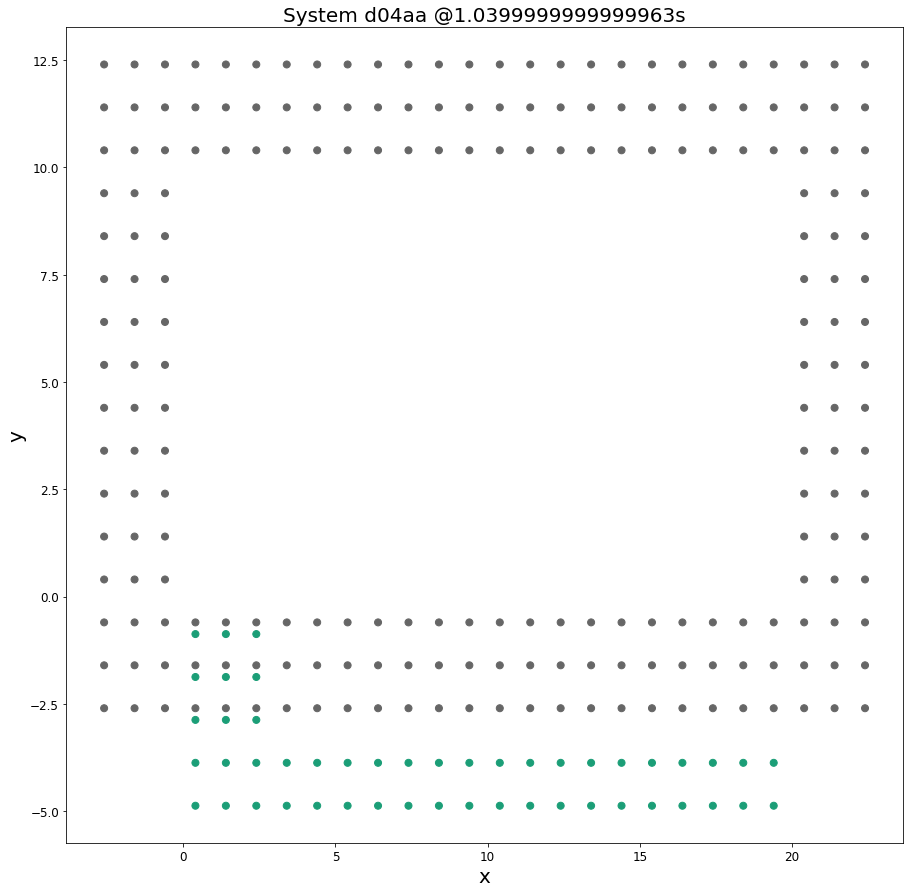

In [26]:
grid.plot()

In [19]:
plt.savefig(f'{SAVE_DIR}/figure_1.png')

<Figure size 1080x1080 with 0 Axes>